In [1]:
import os
import pandas as pd
# import IPython.display as ipd
# import librosa
# import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob
import json

In [2]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Preparing the data:

In [3]:
data = pd.read_csv('../corpus/generated_chords/chromas.csv')
data.set_index('Unnamed: 0', inplace=True)
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true
Unnamed: 0,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim


In [4]:
def fix_meio_dim(chord):
    if 'meio' in chord:
        return chord + '_dim'
    else:
        return chord
    
data['true_fixed'] = data['true'].map(fix_meio_dim)
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed
Unnamed: 0,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim,Cdim


Carregando os chromas perfeitos:

In [5]:
# Opening JSON file
with open('perfect_chromas.json') as json_file:
    perfect_chromas = json.load(json_file)
    
perfect_chromas

{'Cmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Dbmaj7': [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Dmaj7': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Ebmaj7': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Emaj7': [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Fmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gbmaj7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Gmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Abmaj7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 'Amaj7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 'Bbmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
 'Bmaj7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 'C7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Db7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0

In [6]:
vec_Cmaj7 = perfect_chromas['Cmaj7']
vec_Cmaj7 = np.array(vec_Cmaj7)
vec_Cmaj7

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])

In [7]:
dists = {}
for key, value in perfect_chromas.items():
#     chroma_norm = vec_Cmaj7.T/chroma.max()
    value = np.array(value)
    dist = np.linalg.norm(value - vec_Cmaj7)
    print('Acorde:', key, '|', 'Distância:', dist)
    dists[key] = dist
    print('--------------------------------')

Acorde: Cmaj7 | Distância: 0.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 | Distância: 2.449489742783178
-------

A representação de um acorde será determinada a partir da distância dele ao Cmaj7. Abaixo, calculamos essas distâncias e ordenamos os acordes de acordo com elas.

In [8]:
df_chords_codes = pd.DataFrame(data=dists.values(), index=dists.keys()).sort_values(0, ascending=True)

df_chords_codes.rename(columns={0:'distance'}, 
                       inplace=True)

df_chords_codes['target'] = list(range(len(df_chords_codes)))
df_chords_codes

,distance,target
Cmaj7,0.000000,0
Emin7,1.414214,1
Amin7,1.414214,2
Dbmeio_dim,1.414214,3
C7,1.414214,4
Dbdim,2.000000,5
Edim,2.000000,6
Dbmin7,2.000000,7
Cmin7,2.000000,8
Gdim,2.000000,9


In [9]:
# df_chords_codes.reset_index()

In [10]:
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed
Unnamed: 0,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim,Cdim


In [11]:
df_model = data.reset_index().merge(df_chords_codes.reset_index(), 
                      left_on='true_fixed', 
                      right_on='index')

df_model.set_index('Unnamed: 0', inplace=True)

df_model.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed,index,distance,target
Unnamed: 0,,,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim,Adim,2.44949,30
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim,Adim,2.44949,30
Adim_ngbaka-maibo_Flute.ogg,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,35372.738281,11123.214844,Adim,Adim,Adim,2.44949,30
Adim_york-samai_Flute.ogg,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,9719.834961,3865.388672,Adim,Adim,Adim,2.44949,30
Adim_mpre_Flute.ogg,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,23711.197266,7769.175293,Adim,Adim,Adim,2.44949,30


In [12]:
df_model.shape

(21420, 17)

In [13]:
# normalizando cada coluna
# dividindo pelo valor máximo de cada chroma
for note in notes:
    df_model[note + '_norm'] = df_model[note]/df_model[notes].max(axis=1)
    
df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,...,0.051887,0.421232,0.236172,0.094706,0.436516,0.248160,0.146094,1.000000,0.288199,0.096547
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,...,0.049189,0.406956,0.287159,0.130650,0.597580,0.202693,0.140847,1.000000,0.277790,0.066827
Adim_ngbaka-maibo_Flute.ogg,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,...,0.032702,0.270117,0.264072,0.116635,0.509378,0.225848,0.148729,1.000000,0.237501,0.074684
Adim_york-samai_Flute.ogg,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,...,0.049192,0.397219,0.167596,0.168372,1.000000,0.303080,0.096699,0.624604,0.222966,0.088669
Adim_mpre_Flute.ogg,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,...,0.043253,0.354718,0.261496,0.126166,0.597047,0.254110,0.147124,1.000000,0.266294,0.087253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Emaj7_outside_now_Mandolin.ogg,10574.058594,1926.091675,3433.316162,56737.890625,212276.109375,22103.914062,3112.023438,11845.454102,49821.421875,7870.000000,...,0.016174,0.267283,1.000000,0.104128,0.014660,0.055802,0.234701,0.037074,0.066011,0.321496
Emaj7_aksak_Mandolin.ogg,10376.426758,1492.088745,3527.731445,51728.863281,170200.609375,17468.171875,2854.901367,9171.428711,42606.144531,7182.869629,...,0.020727,0.303929,1.000000,0.102633,0.016774,0.053886,0.250329,0.042202,0.087547,0.426162
Emaj7_york-samai_Mandolin.ogg,8939.829102,946.150879,3648.095459,44141.421875,112385.398438,11260.331055,2627.489502,10729.942383,48903.035156,7757.161621,...,0.032461,0.392768,1.000000,0.100194,0.023379,0.095475,0.435137,0.069023,0.121397,0.585751


In [14]:
df_model.columns

Index(['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B', 'true',
       'true_fixed', 'index', 'distance', 'target', 'C_norm', 'Db_norm',
       'D_norm', 'Eb_norm', 'E_norm', 'F_norm', 'Gb_norm', 'G_norm', 'Ab_norm',
       'A_norm', 'Bb_norm', 'B_norm'],
      dtype='object')

### Train/test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_model[list(map(lambda x:x+'_norm', notes))],
                                                    df_model['target'],
                                                    test_size=0.3)

In [17]:
y_train

Unnamed: 0
D7_mpre_Flute.ogg                   42
F7_mpre_Guitar.ogg                  43
Edim_venda_clapping_Clarinet.ogg     6
Bbdim_venda_Mandolin.ogg            13
Bmeio_dim_aka_Saxophone.ogg         52
                                    ..
Edim_ngbaka-maibo_Guitar.ogg         6
Emaj7_venda_clapping_Choir.ogg      20
Ddim_bossa-nova_Banjo.ogg           22
Amin7_bossa-nova_Mandolin.ogg        2
Abmaj7_ruchenitza_2_Guitar.ogg      17
Name: target, Length: 14994, dtype: int64

### Gaussian process model

In [18]:
from sklearn.gaussian_process.kernels import Kernel, Hyperparameter
from sklearn.gaussian_process.kernels import GenericKernelMixin
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.base import clone

In [19]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [20]:
# from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(X_train, y_train)

gpr.score(X_train, y_train)

# gpr.predict(X[:2,:], return_std=True)


0.41544463761275496

In [29]:
y_pred = gpr.predict(X_test)
y_pred

array([38.03974924, 36.2590559 , 31.40437652, ..., 38.01157809,
       16.77744973, 27.03242246])

In [30]:
# y_pred = y_pred.round()
# y_pred

### Classification report

In [25]:
from sklearn.metrics import classification_report

Calcular métricas de avaliação de performance de regressão (resíduos)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -6.0       0.00      0.00      0.00         0
        -4.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.50      0.01      0.02        97
         1.0       0.00      0.00      0.00       105
         2.0       0.09      0.01      0.02        89
         3.0       0.23      0.03      0.05       111
         4.0       0.25      0.03      0.06       119
         5.0       0.00      0.00      0.00       107
         6.0       0.00      0.00      0.00       103
         7.0       0.00      0.00      0.00       117
         8.0       0.00      0.00      0.00        92
         9.0       0.00      0.00      0.00        98
        10.0       0.04      0.02      0.03       108
        11.0       0.00      0.00      0.00       114
        12.0       0.13      0.10      0.11       109
        13.0       0.00    

/home/fccoelho/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fccoelho/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fccoelho/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fccoelho/.local/lib/python3.10/si

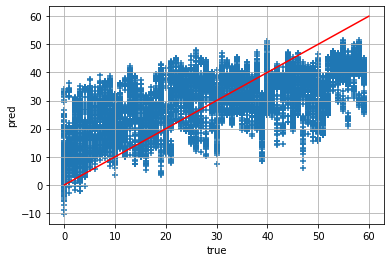

In [36]:
plt.scatter(y_test, y_pred, marker='+')
plt.plot([0,60], [0,60], color='red')
plt.xlabel('true')
plt.ylabel('pred')
plt.grid()

# Multinomial Naive Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [49]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.78      0.48        97
           1       0.57      0.62      0.59       105
           2       0.53      0.83      0.65        89
           3       0.71      0.42      0.53       111
           4       0.86      0.32      0.47       119
           5       0.65      0.31      0.42       107
           6       0.40      0.38      0.39       103
           7       0.69      0.60      0.64       117
           8       0.39      0.67      0.49        92
           9       0.28      0.39      0.32        98
          10       0.66      0.43      0.52       108
          11       0.65      0.58      0.61       114
          12       0.47      0.42      0.44       109
          13       0.45      0.59      0.51        95
          14       0.84      0.54      0.66       113
          15       0.82      0.28      0.42       115
          16       0.55      0.59      0.57        95
          17       0.58    

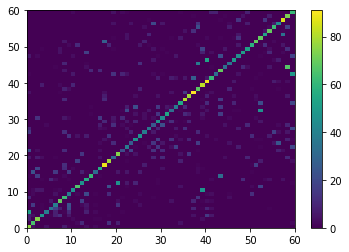

In [47]:
plt.pcolor(confusion_matrix(y_test, y_pred))
plt.colorbar();

In [50]:
matthews_corrcoef(y_test, y_pred)

0.5036518760176091

# LinearSVC

In [51]:
from sklearn.svm import LinearSVC

In [52]:
lsvc = LinearSVC().fit(X_train, y_train)


In [54]:
y_pred = lsvc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69        97
           1       0.66      0.88      0.75       105
           2       0.64      0.89      0.75        89
           3       0.49      0.75      0.59       111
           4       0.72      0.66      0.69       119
           5       0.71      0.35      0.47       107
           6       0.41      0.26      0.32       103
           7       0.76      0.72      0.74       117
           8       0.66      0.67      0.67        92
           9       0.51      0.47      0.49        98
          10       0.67      0.58      0.62       108
          11       0.57      0.57      0.57       114
          12       0.85      0.61      0.71       109
          13       0.59      0.54      0.56        95
          14       0.71      0.66      0.68       113
          15       0.73      0.50      0.60       115
          16       0.62      0.81      0.70        95
          17       0.72    

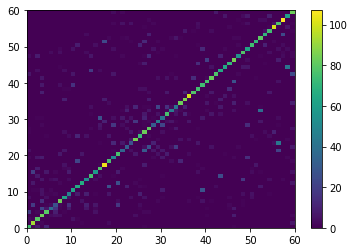

In [55]:
plt.pcolor(confusion_matrix(y_test, y_pred))
plt.colorbar();

In [56]:
matthews_corrcoef(y_test, y_pred)

0.6365931458088372

# SVC

In [57]:
from sklearn.svm import SVC

In [58]:
svc = SVC().fit(X_train, y_train)

In [59]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.96      0.93      0.95       105
           2       0.91      0.90      0.90        89
           3       0.74      0.88      0.81       111
           4       0.87      0.86      0.86       119
           5       0.84      0.75      0.79       107
           6       0.76      0.66      0.71       103
           7       0.92      0.90      0.91       117
           8       0.75      0.97      0.84        92
           9       0.78      0.69      0.74        98
          10       0.68      0.97      0.80       108
          11       0.63      0.98      0.77       114
          12       0.72      0.69      0.70       109
          13       0.76      0.85      0.81        95
          14       0.86      0.77      0.81       113
          15       0.83      0.78      0.81       115
          16       0.89      0.91      0.90        95
          17       0.87    

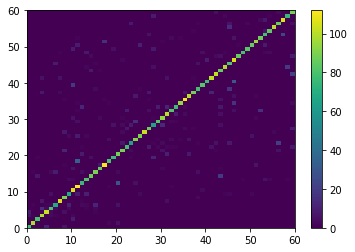

In [60]:
plt.pcolor(confusion_matrix(y_test, y_pred))
plt.colorbar();

In [61]:
matthews_corrcoef(y_test, y_pred)

0.8202878034835172